**MSc in Business Administration, Analytics & Information Systems**  
**National and Kapodistrian University of Athens**    
  
Master Thesis:
**Predicting Crop Diseases with Machine Learning**  
  
Author: **Iosif El Tarchouni**   
Email: [iosif.eltarchouni@outlook.com](mailto:iosif.eltarchouni@outlook.com)    
$~~~~~~~~~$ [iosifeltar@econ.uoa.gr](mailto:iosifeltar@econ.uoa.gr)  
Supervisor: **Evangelia Petraki PhD**  
Email: [evpetra@econ.uoa.gr](mailto:evpetra@econ.uoa.gr) 

# Applying Machine Learning Models to Predict Powdery Mildew on Grapes, Using Weather.

## TOC:
**a. [Importing Libraries](#a.-Importing-Libraries)**  
**b. [Loading Datasets](#b.-Loading-Datasets)**    
**c. [Splitting Data into Training and Test Sets](#c.-Splitting-Data-into-Training-and-Test-Sets)**   
**d. [K-Nearest Neighbour (KNN)](#d.-K-Nearest-Neighbour-(KNN))**  
$~~$d.1 [Creating & Fitting the KNN Model](#d.1-Creating-&-Fitting-the-KNN-Model)    
$~~$d.2 [Making Predictions Using the KNN Model](#d.2-Making-Predictions-Using-the-KNN-Model)    
$~~$d.3 [KNN Model Evaluation](#d.3-KNN-Model-Evaluation)  
**e. [Naive Bayes Classifier (NBC)](#e.-Naive-Bayes-Classifier-(NBC))**   
$~~$e.1 [Creating & Fitting the NBC Model](#e.1-Creating-&-Fitting-the-NBC-Model)    
$~~$e.2 [Making Predictions Using the NBC Model](#e.2-Making-Predictions-Using-the-NBC-Model)    
$~~$e.3 [NBC Model Evaluation](#e.3-NBC-Model-Evaluation)  
**f. [Logistic Regression (LR)](#f.-Logistic-Regression-(LR))**  
$~~$f.1 [Creating & Fitting the LR Model](#f.1-Creating-&-Fitting-the-LR-Model)    
$~~$f.2 [Making Predictions Using the LR Model](#f.2-Making-Predictions-Using-the-LR-Model)    
$~~$f.3 [LR Model Evaluation](#f.3-LR-Model-Evaluation)      
**g. [Random Forest Classifier (RFC)](#g.-Random-Forest-Classifier-(RFC))**     
$~~$g.1 [Creating & Fitting the RFC Model](#g.1-Creating-&-Fitting-the-RFC-Model)    
$~~$g.2 [Making Predictions Using the RFC Model](#g.2-Making-Predictions-Using-the-RFC-Model)    
$~~$g.3 [RFC Model Evaluation](#g.3-RFC-Model-Evaluation)    
**h. [Support Vector Machine Classifier (SVC)](#h.-Support-Vector-Machine-Classifier-(SVC))**       
$~~$h.1 [Creating & Fitting the SVC Model](#h.1-Creating-&-Fitting-the-SVC-Model)    
$~~$h.2 [Making Predictions Using the SVC Model](#h.2-Making-Predictions-Using-the-SVC-Model)    
$~~$h.3 [SVC Model Evaluation](#h.3-SVC-Model-Evaluation)  
**i. [Multi-layer Perceptron Classifier (MLP)](#i.-Multi-layer-Perceptron-Classifier-(MLP))**       
$~~$i.1 [Creating & Fitting the MLP Model](#i.1-Creating-&-Fitting-the-MLP-Model)    
$~~$i.2 [Making Predictions Using the MLP Model](#i.2-Making-Predictions-Using-the-MLP-Model)    
$~~$i.3 [MLP Model Evaluation](#i.3-MLP-Model-Evaluation)

# a. Importing Libraries

In [1]:
#Libraries for data manipulation
import pandas as pd 
import numpy as np

#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#LIBRARIES FOR MACHINE LEARNING

#Method to slip data into training and testing set
from sklearn.model_selection import train_test_split

#ML Algorithms
from sklearn.neighbors import KNeighborsClassifier # K-nearest neighnour (KNN)
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier (NBC)
from sklearn.linear_model import LogisticRegression #Logistic Regression (LR)
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier (RFC)
from sklearn.svm import SVC #Support Verctor Machines Classifier (SVC)
from sklearn.neural_network import MLPClassifier #Artificial Neural Network (MLP)

#Libraries for evaluating the machine learning models
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Libraries for hyperparameter tuning the machine learning models (fine tuning)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Library for data preprocessing
from sklearn.preprocessing import StandardScaler

#Library to manage warnings 
import warnings
warnings.filterwarnings("ignore")

# b. Loading Datasets

In [2]:
df_phomopsis = pd.read_csv(
    "../data/All/df_phomopsis_all.csv", 
     low_memory=False)
df_powdery_mildew = pd.read_csv(
    "../data/All/df_powdery_mildew_all.csv", 
     low_memory=False)
df_black_rot = pd.read_csv(
    "../data/All/df_black_rot_all.csv", 
     low_memory=False)

# c. Splitting Data into Training and Test Sets

In [3]:
X = df_powdery_mildew.iloc[:, 2:-1]
y = df_powdery_mildew.iloc[:, -1]
y=y.astype('int') #changing data type for y

Data Scaling 

In [4]:
X.columns

Index(['avg_air_temp_deg_f', 'max_air_temp_deg_f', 'min_air_temp_deg_f',
       'total_precipitation', 'leaf_wethess_hrs',
       'relative_humidity_(hrs_>=_90)', 'solar_radiation_(langleys)',
       'avg_wind_speed_mph', 'avg_soil_temp_deg_f',
       'avg_soil_moisture_(m3/m3)'],
      dtype='object')

In [5]:
X = StandardScaler().fit_transform(X)

In [6]:
X = pd.DataFrame(X , columns = [
       'avg_air_temp_deg_f', 'max_air_temp_deg_f', 'min_air_temp_deg_f',
       'total_precipitation', 'leaf_wethess_hrs',
       'relative_humidity_(hrs_>=_90)', 'solar_radiation_(langleys)',
       'avg_wind_speed_mph', 'avg_soil_temp_deg_f',
       'avg_soil_moisture_(m3/m3)'
])

In [7]:
X.head()

,avg_air_temp_deg_f,max_air_temp_deg_f,min_air_temp_deg_f,total_precipitation,leaf_wethess_hrs,relative_humidity_(hrs_>=_90),solar_radiation_(langleys),avg_wind_speed_mph,avg_soil_temp_deg_f,avg_soil_moisture_(m3/m3)
0,-1.725415,-1.697904,-1.705747,-0.278727,-0.576235,-0.330693,-1.513369,-0.549868,-1.431817,0.420710
1,-1.566479,-1.642920,-1.424821,-0.278727,-0.576235,-0.330693,-1.599959,0.128969,-1.486887,0.301940
2,-1.521069,-1.572940,-1.412052,-0.278727,-0.576235,-0.330693,-1.361837,0.772078,-1.521305,0.034708
3,-1.248607,-1.407987,-1.003432,-0.278727,-0.576235,-0.330693,-1.291483,0.879263,-1.555724,-0.024677
4,-1.345104,-1.353002,-1.290743,-0.278727,-0.576235,-0.330693,-1.296894,-0.585596,-1.555724,-0.291909


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0)

In [9]:
X_test.head()

,avg_air_temp_deg_f,max_air_temp_deg_f,min_air_temp_deg_f,total_precipitation,leaf_wethess_hrs,relative_humidity_(hrs_>=_90),solar_radiation_(langleys),avg_wind_speed_mph,avg_soil_temp_deg_f,avg_soil_moisture_(m3/m3)
1156,-0.715036,-0.653202,-0.773583,-0.278727,-0.576235,-0.330693,-0.463466,1.915383,-0.922423,-0.291909
9353,0.919734,0.901355,0.911975,-0.278727,-0.576235,-0.330693,0.175135,-0.514140,0.488735,-0.321601
10595,0.198846,0.281532,0.081965,-0.278727,-0.576235,-0.330693,1.176331,-0.156857,0.082597,0.301940
8263,1.254635,1.101298,1.409981,-0.278727,-0.576235,-0.330693,1.008563,0.450524,1.321663,-2.370380
5094,1.691709,1.686132,1.652599,-0.278727,-0.576235,-0.330693,1.484807,-0.371226,1.817290,0.391018


In [10]:
X_train.shape, y_train.shape

((8912, 10), (8912,))

In [11]:
X_test.shape, y_test.shape

((2229, 10), (2229,))

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: powdery_mildew, dtype: int32

In [13]:
X.head()

,avg_air_temp_deg_f,max_air_temp_deg_f,min_air_temp_deg_f,total_precipitation,leaf_wethess_hrs,relative_humidity_(hrs_>=_90),solar_radiation_(langleys),avg_wind_speed_mph,avg_soil_temp_deg_f,avg_soil_moisture_(m3/m3)
0,-1.725415,-1.697904,-1.705747,-0.278727,-0.576235,-0.330693,-1.513369,-0.549868,-1.431817,0.420710
1,-1.566479,-1.642920,-1.424821,-0.278727,-0.576235,-0.330693,-1.599959,0.128969,-1.486887,0.301940
2,-1.521069,-1.572940,-1.412052,-0.278727,-0.576235,-0.330693,-1.361837,0.772078,-1.521305,0.034708
3,-1.248607,-1.407987,-1.003432,-0.278727,-0.576235,-0.330693,-1.291483,0.879263,-1.555724,-0.024677
4,-1.345104,-1.353002,-1.290743,-0.278727,-0.576235,-0.330693,-1.296894,-0.585596,-1.555724,-0.291909


In [14]:
y.sample(5)

605     0
1565    0
4462    0
6977    0
4793    0
Name: powdery_mildew, dtype: int32

# d. K-Nearest Neighbour (KNN)

## d.1 Creating & Fitting the KNN Model

Selecting the number of neighbours N and creating the KNN classifier model. 
Since KNN is a lazy algorithm we fit the entire dataset to the model without using the train-test split

Initial Model

In [15]:
k = 3 #Number of nearest neighbours used
knn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X, y)#Creating Model and fitting data
knn_classifier

KNeighborsClassifier(n_neighbors=3)

Hyperparameter Tuning a model using Train Data

In [16]:
pipe = KNeighborsClassifier()

param_grid = {
              'n_neighbors' : [3, 5, 7, 9], 
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p' : [1, 2],
              'metric' : ['minkowski','euclidean','manhattan']
}

gs = GridSearchCV(
                  estimator = pipe, 
                  param_grid = param_grid, 
                  scoring = 'accuracy',
                  n_jobs = -1, 
                  cv = 5,
)

# run gridearch
gs = gs.fit(X_train, y_train)

In [17]:
gs.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 7,
 'p': 1,
 'weights': 'distance'}

In [18]:
gs.best_score_

0.986310792854072

In [19]:
knn_classifier_fine_tuned = KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_neighbors = 7, p = 1, weights = 'distance').fit(X_train, y_train) #Creating Model and fitting data
knn_classifier_fine_tuned

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

Hyperparameter Tuning a model using all Data

In [20]:
pipe = KNeighborsClassifier()

param_grid = {
               'n_neighbors' : [3, 5, 7, 9], 
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'p' : [1, 2],
               'metric' : ['minkowski','euclidean','manhattan']
}

gs = GridSearchCV(
                  estimator = pipe, 
                  param_grid = param_grid, 
                  scoring = 'accuracy',
                  n_jobs = -1, 
                  cv = 5,
)

# run gridearch
gs = gs.fit(X, y)

In [21]:
gs.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 7,
 'p': 1,
 'weights': 'distance'}

In [22]:
gs.best_score_

0.9871647444772798

In [23]:
knn_classifier_fine_tuned_lazy = KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_neighbors = 7, p = 1, weights = 'distance').fit(X, y) #Creating Model and fitting data
knn_classifier_fine_tuned_lazy

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

## d.2 Making Predictions Using the KNN Model

In [24]:
y_pred = knn_classifier.predict(X) #Making predictions with initial model 
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
y_pred_tuned = knn_classifier_fine_tuned.predict(X_test) #Making predictions with fine tuned model
y_pred_tuned

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_pred_tuned_lazy = knn_classifier_fine_tuned_lazy.predict(X) #Making predictions with fine tuned model using X trained Model
y_pred_tuned_lazy

array([0, 0, 0, ..., 0, 0, 0])

## d.3 KNN Model Evaluation

### Evaluating model performance

### Accuracy score

In [27]:
knn_classifier.score(X, y) #Initial Model Accuracy Score

0.9928193160398529

In [28]:
knn_classifier_fine_tuned.score(X_train, y_train) #Fine Tuned Model Accuracy Score on training data

1.0

In [29]:
knn_classifier_fine_tuned.score(X_test, y_test) #Fine Tuned Model Accuracy Score on test data

0.987438313144908

In [30]:
knn_classifier_fine_tuned_lazy.score(X, y) #Fine Tuned Model Accuracy Score trained on X

1.0

### Confusion Matrix 

Initial model predictions confusion matrix

In [31]:
matrix = pd.crosstab(y, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,10717,22,10739
1,58,344,402
All,10775,366,11141


Classification Metrics

In [32]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [33]:
classification_accuracy

0.9928193160398529

In [34]:
classification_error

0.007180683960147204

In [35]:
precision

0.8557213930348259

In [36]:
recall

0.9398907103825137

In [37]:
true_positive_rate

0.9398907103825137

In [38]:
false_positive_rate

0.005382830626450116

In [39]:
specificity

0.9946171693735499

Fine tuned model predictions confusion matrix

In [40]:
matrix = pd.crosstab(y_test, y_pred_tuned, rownames = ['True'], colnames = ['Predicted'], margins = True)#the results are improved with scaled data
matrix

Predicted,0,1,All
True,,,
0,2134,5,2139
1,23,67,90
All,2157,72,2229


Classification Metrics

In [41]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [42]:
classification_accuracy

0.987438313144908

In [43]:
classification_error

0.01256168685509197

In [44]:
precision

0.7444444444444445

In [45]:
recall

0.9305555555555556

In [46]:
true_positive_rate

0.9305555555555556

In [47]:
false_positive_rate

0.010662957811775614

In [48]:
specificity

0.9893370421882244

Fine tuned model predictions confusion matrix (Trained on X)

In [49]:
matrix = pd.crosstab(y, y_pred_tuned_lazy, rownames = ['True'], colnames = ['Predicted'], margins = True)#the results are improved with scaled data
matrix 

Predicted,0,1,All
True,,,
0,10739,0,10739
1,0,402,402
All,10739,402,11141


Classification Metrics

In [50]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [51]:
classification_accuracy

1.0

In [52]:
classification_error

0.0

In [53]:
precision

1.0

In [54]:
recall

1.0

In [55]:
true_positive_rate

1.0

In [56]:
false_positive_rate

0.0

In [57]:
specificity

1.0

### Compare different number of k for neighbors for initial model

In [58]:
neighbors = np.arange(2, 20)
accuracy = np.empty(len(neighbors))

In [59]:
for i, k in enumerate(neighbors):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X, y)

    accuracy[i] = knn_classifier.score(X, y)

accuracy

array([0.99120366, 0.99281932, 0.98922897, 0.99084463, 0.98869042,
       0.99012656, 0.98779284, 0.98913922, 0.98770308, 0.98824163,
       0.98689525, 0.98752356, 0.98626694, 0.98725429, 0.98626694,
       0.98662598, 0.98554887, 0.9863567 ])

### Accuracy Plot

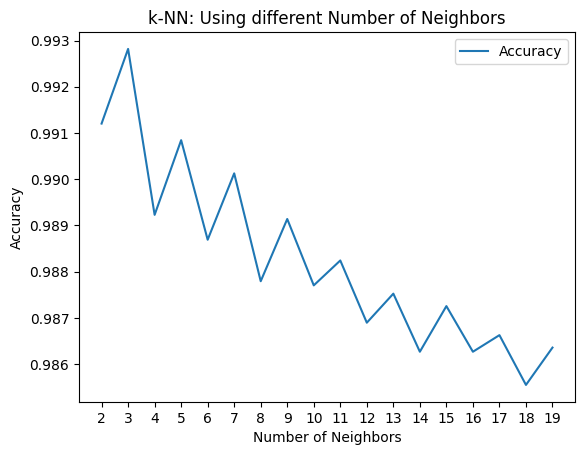

In [60]:
plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracy, label='Accuracy')
plt.xticks(range(2,20))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

According to the accuracy plot the optimal number of K nearest neighbors is 3, as the number of K increases the accuracy rapidly decreases. 

### Compare different number of k for neighbors for fine tuned model

In [61]:
neighbors = np.arange(2, 20)
accuracy = np.empty(len(neighbors))

In [62]:
for i, k in enumerate(neighbors):

    knn_classifier_fine_tuned = KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_neighbors = k, p = 1, weights = 'distance')

    knn_classifier_fine_tuned.fit(X_train, y_train)

    accuracy[i] = knn_classifier_fine_tuned.score(X_test, y_test)

accuracy

array([0.98564379, 0.98564379, 0.98878421, 0.98698968, 0.98878421,
       0.98743831, 0.98743831, 0.98788694, 0.98788694, 0.98833558,
       0.98833558, 0.98833558, 0.98743831, 0.98654105, 0.98743831,
       0.98654105, 0.98609242, 0.98609242])

### Accuracy Plot

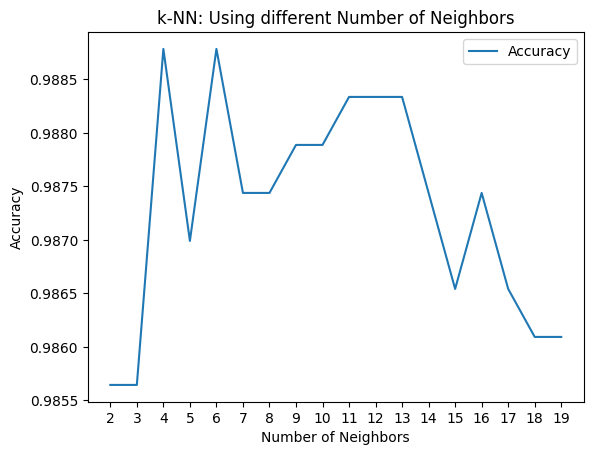

In [63]:
plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracy, label='Accuracy')
plt.xticks(range(2,20))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

### Compare different number of k for neighbors for fine tuned model (Trained on X data)

In [64]:
neighbors = np.arange(2, 20)
accuracy = np.empty(len(neighbors))

In [65]:
for i, k in enumerate(neighbors):

    knn_classifier_fine_tuned_lazy = KNeighborsClassifier(algorithm = 'auto', metric = 'minkowski', n_neighbors = k, p = 1, weights = 'distance')

    knn_classifier_fine_tuned_lazy.fit(X, y)

    accuracy[i] = knn_classifier_fine_tuned_lazy.score(X, y)

accuracy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

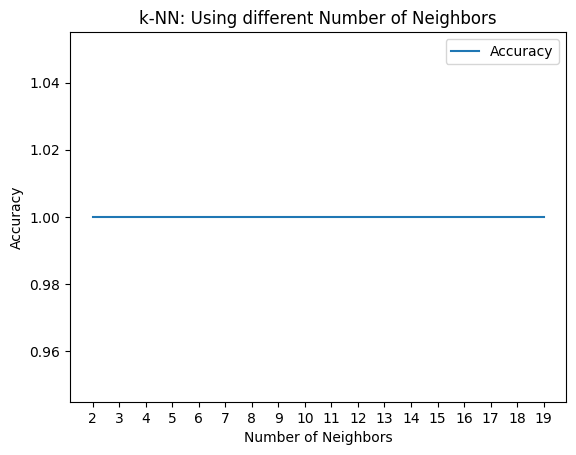

In [66]:
plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracy, label='Accuracy')
plt.xticks(range(2,20))
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

When giving weights on distances the model has 100% overfitting since it is trained and tested by the same data

# e. Naive Bayes Classifier (NBC)

## e.1 Creating & Fitting the NBC Model

Creating Naive Bayes Classifier as an object

Fitting NBC on train data

In [67]:
gnb_classifier = GaussianNB().fit(X_train, y_train) #NBC model trained using training set

In [68]:
pipe = GaussianNB()

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb_classifier_cv = GridSearchCV(
                                  estimator = pipe, 
                                  param_grid = param_grid, 
                                  scoring = 'accuracy',
                                  n_jobs = -1, 
                                  cv = 5,
)

grid_gnb_classifier_cv = gnb_classifier_cv.fit(X_train, y_train)  #NBC model trained using 5 fold cross validation

In [69]:
grid_gnb_classifier_cv.best_params_

{'var_smoothing': 0.01}

In [70]:
grid_gnb_classifier_cv.best_score_

0.9652164443714266

In [71]:
gnb_classifier_fine_tuned = GaussianNB(var_smoothing = 0.01).fit(X_train, y_train)

## e.2 Making Predictions Using the NBC Model

NBC Model Predictions 

In [72]:
y_pred = gnb_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

CV-NBC Model Predictions 

In [73]:
y_pred_tuned = gnb_classifier_fine_tuned.predict(X_test)
y_pred_tuned

array([0, 0, 0, ..., 0, 0, 0])

## e.3 NBC Model Evaluation

### Evaluating model performance

### Accuracy score

In [74]:
gnb_classifier.score(X_train, y_train) #train accuracy

0.9649910233393177

In [75]:
gnb_classifier.score(X_test, y_pred) #test accuracy

1.0

In [76]:
gnb_classifier_fine_tuned.score(X_train, y_train) #train accuracy

0.96487881508079

In [77]:
gnb_classifier_fine_tuned.score(X_test, y_pred_tuned) #5-Fold cross validation accuracy

1.0

### Confusion Matrix

Classification Metrics

In [78]:
matrix = pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)#the results are improved with scaled data
matrix 

Predicted,0,1,All
True,,,
0,2090,49,2139
1,28,62,90
All,2118,111,2229


In [79]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [80]:
classification_accuracy

0.9654553611484971

In [81]:
classification_error

0.03454463885150292

In [82]:
precision

0.6888888888888889

In [83]:
recall

0.5585585585585585

In [84]:
true_positive_rate

0.5585585585585585

In [85]:
false_positive_rate

0.013220018885741265

In [86]:
specificity

0.9867799811142587

Classification Metrics

In [87]:
matrix = pd.crosstab(y_test, y_pred_tuned, rownames = ['True'], colnames = ['Predicted'], margins = True)#the results are improved with scaled data
matrix 

Predicted,0,1,All
True,,,
0,2090,49,2139
1,28,62,90
All,2118,111,2229


In [88]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [89]:
classification_accuracy

0.9654553611484971

In [90]:
classification_error

0.03454463885150292

In [91]:
precision

0.6888888888888889

In [92]:
recall

0.5585585585585585

In [93]:
true_positive_rate

0.5585585585585585

In [94]:
false_positive_rate

0.013220018885741265

In [95]:
specificity

0.9867799811142587

# f. Logistic Regression (LR)

## f.1 Creating & Fitting the LR Model

Logistic Regression Algorithm

In [96]:
lr_classifier = LogisticRegression(random_state=0, max_iter=200).fit(X_train, y_train)

In [97]:
pipe = Pipeline([('classifier' , LogisticRegression())])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
]

lr_classifier_cv = GridSearchCV(
                                pipe, 
                                param_grid = param_grid, 
                                cv = 3, 
                                verbose=True, 
                                n_jobs=-1
)

grid_lr_classifier_cv = lr_classifier_cv.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


In [98]:
grid_lr_classifier_cv.best_params_

{'classifier': LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear'),
 'classifier__C': 0.615848211066026,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [99]:
lr_classifier_tuned = LogisticRegression(C = 0.615848211066026, penalty = 'l1', solver = 'liblinear').fit(X_train, y_train)

### Logistic Regression Model Parameters

Initial Model Parameters

In [100]:
lr_classifier.n_features_in_

10

In [101]:
lr_classifier.classes_

array([0, 1])

In [102]:
lr_classifier.coef_

array([[ 0.28679184,  1.08953918, -0.75587414,  0.71784946,  0.81275168,
        -0.23195985, -0.98479949,  0.42359458,  1.48875495,  0.30488119]])

In [103]:
lr_classifier.intercept_

array([-4.85526001])

In [104]:
lr_classifier.decision_function(X_test)

array([-5.9734892 , -4.65117857, -6.15503155, ..., -6.41501662,
       -4.71868226, -5.78629799])

In [105]:
lr_classifier.get_params([X_test])

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [106]:
lr_classifier.n_iter_

array([31])

Fine Tuned Model Parameters

In [107]:
lr_classifier_tuned.n_features_in_

10

In [108]:
lr_classifier_tuned.classes_

array([0, 1])

In [109]:
lr_classifier_tuned.coef_

array([[ 0.        ,  1.17785581, -0.56449   ,  0.712159  ,  0.7994517 ,
        -0.22318858, -0.94857384,  0.41260267,  1.45111635,  0.28938688]])

In [110]:
lr_classifier_tuned.intercept_

array([-4.80751124])

In [111]:
lr_classifier_tuned.decision_function(X_test)

array([-5.91866596, -4.60812704, -6.08085959, ..., -6.33056678,
       -4.67856963, -5.71043266])

In [112]:
lr_classifier_tuned.get_params([X_test])

{'C': 0.615848211066026,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## f.2 Making Predictions Using the LR Model

In [113]:
y_pred = lr_classifier.predict(X_test) #predictions with default threshold #Using the initial model
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
y_proba = lr_classifier.predict_proba(X_test) #predictions of the probability  #Using the initial model
y_proba

array([[0.99746112, 0.00253888],
       [0.99054001, 0.00945999],
       [0.99788172, 0.00211828],
       ...,
       [0.99836588, 0.00163412],
       [0.99115205, 0.00884795],
       [0.99694007, 0.00305993]])

In [115]:
y_proba_pred = (lr_classifier.predict_proba(X_test)[:,1] >= 0.2).astype(int) #predictions of the probability tuned with 5% threshold  #Using the initial model
y_proba_pred 

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
y_pred_tuned = lr_classifier_tuned.predict(X_test) #predictions with default threshold  #Using the fine tuned model
y_pred_tuned

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
y_proba_tuned = lr_classifier_tuned.predict_proba(X_test) #predictions of the probability #Using the fine tuned model
y_proba_tuned

array([[0.99731843, 0.00268157],
       [0.99012795, 0.00987205],
       [0.997719  , 0.002281  ],
       ...,
       [0.99822214, 0.00177786],
       [0.99079326, 0.00920674],
       [0.99669969, 0.00330031]])

In [118]:
y_proba_pred_tuned = (lr_classifier_tuned.predict_proba(X_test)[:,1] >= 0.1).astype(int) #predictions of the probability tuned with 5% threshold #Using the fine tuned model
y_proba_pred_tuned

array([0, 0, 0, ..., 0, 0, 0])

## f.3 LR Model Evaluation

### Accuracy

In [119]:
lr_classifier.score(X_train, y_train) #train accuracy

0.9686938958707361

In [120]:
lr_classifier.score(X_test, y_test) #test accuracy

0.9659039928218932

In [121]:
f1_score(y_test, y_proba_pred, average='binary')

0.5368421052631579

In [122]:
lr_classifier.n_iter_

array([31])

Evaluating the fine tuned model

In [123]:
lr_classifier_tuned.score(X_train, y_train)

0.9686938958707361

In [124]:
lr_classifier_tuned.score(X_test, y_proba_pred_tuned)

0.9515477792732167

In [125]:
f1_score(y_test, y_proba_pred_tuned, average='binary')

0.5299145299145299

### Confusion Matrix

Confusion Matrix of Predictions made by the initial model

In [126]:
matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2128,11,2139
1,65,25,90
All,2193,36,2229


In [127]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [128]:
classification_accuracy

0.9659039928218932

In [129]:
classification_error

0.03409600717810678

In [130]:
precision

0.2777777777777778

In [131]:
recall

0.6944444444444444

In [132]:
true_positive_rate

0.6944444444444444

In [133]:
false_positive_rate

0.029639762881896944

In [134]:
specificity

0.970360237118103

Confusion Matrix of Predictions using 20% threshold made by the initial model

In [135]:
matrix = pd.crosstab(y_test, y_proba_pred, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2090,49,2139
1,39,51,90
All,2129,100,2229


In [136]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [137]:
classification_accuracy

0.9605204127411395

In [138]:
classification_error

0.03947958725886048

In [139]:
precision

0.5666666666666667

In [140]:
recall

0.51

In [141]:
true_positive_rate

0.51

In [142]:
false_positive_rate

0.018318459370596524

In [143]:
specificity

0.9816815406294035

Confusion Matrix of Predictions made by the fine tuned model

In [144]:
matrix = pd.crosstab(y_test, y_pred_tuned, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2128,11,2139
1,65,25,90
All,2193,36,2229


In [145]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [146]:
classification_accuracy

0.9659039928218932

In [147]:
classification_error

0.03409600717810678

In [148]:
precision

0.2777777777777778

In [149]:
recall

0.6944444444444444

In [150]:
true_positive_rate

0.6944444444444444

In [151]:
false_positive_rate

0.029639762881896944

In [152]:
specificity

0.970360237118103

Since all predictions came out as 0 not infected, the classification metrics cannot be measured

Confusion Matrix of Predictions using 10% threshold made by the fine tuned model

In [153]:
matrix = pd.crosstab(y_test, y_proba_pred_tuned, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2057,82,2139
1,28,62,90
All,2085,144,2229


In [154]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [155]:
classification_accuracy

0.9506505159264244

In [156]:
classification_error

0.049349484073575596

In [157]:
precision

0.6888888888888889

In [158]:
recall

0.4305555555555556

In [159]:
true_positive_rate

0.4305555555555556

In [160]:
false_positive_rate

0.01342925659472422

In [161]:
specificity

0.9865707434052757

# g. Random Forest Classifier (RFC)

## g.1 Creating & Fitting the RFC Model

In [162]:
rf_classifier = RandomForestClassifier().fit(X_train, y_train)

Building Random Forest Model with hyperparameter tuning

In [163]:
pipe = RandomForestClassifier()

distributions  = dict(
                      n_estimators = [100, 200, 300, 400, 500], 
                      criterion = ['gini','entropy','log_loss'],
                      max_features = ['sqrt', 'log2', None],
                      max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                      min_samples_leaf = [1, 2, 4],
                      min_samples_split= [2, 5, 10],
                      bootstrap = [True],
                      oob_score = [True]
                
)

rf_classifier_cv = RandomizedSearchCV(
                                          pipe, 
                                          distributions, 
                                          scoring = 'accuracy',
                                          n_jobs = -1, 
                                          cv = 3,
)

# run gridearch
grid_rf_classifier_cv = rf_classifier_cv.fit(X_train, y_train)

In [164]:
grid_rf_classifier_cv.best_params_

{'oob_score': True,
 'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

In [165]:
rf_classifier_tuned = RandomForestClassifier(oob_score = True,
                                             n_estimators = 100,
                                             min_samples_split = 10,
                                             min_samples_leaf = 1,
                                             max_features = 'log2',
                                             max_depth = 20,
                                             criterion = 'entropy',
                                             bootstrap = True).fit(X_train, y_train)

With GridSearchCV

## g.2 Making Predictions Using the RFC Model

In [166]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [167]:
y_pred_tuned = rf_classifier_tuned.predict(X_test)
y_pred_tuned

array([0, 0, 0, ..., 0, 0, 0])

## g.3 RFC Model Evaluation

In [168]:
rf_classifier.score(X_train, y_train)

1.0

In [169]:
rf_classifier.score(X_test, y_test)

0.9973082099596231

In [170]:
rf_classifier_tuned.score(X_train, y_train)

0.9977558348294434

In [171]:
rf_classifier_tuned.score(X_test, y_test)

0.9973082099596231

### Confusion Matrix

Confusion Matrix of Predictions made by the initial model

In [172]:
matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2137,2,2139
1,4,86,90
All,2141,88,2229


In [173]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [174]:
classification_accuracy

0.9973082099596231

In [175]:
classification_error

0.0026917900403768506

In [176]:
precision

0.9555555555555556

In [177]:
recall

0.9772727272727273

In [178]:
true_positive_rate

0.9772727272727273

In [179]:
false_positive_rate

0.0018682858477347033

In [180]:
specificity

0.9981317141522653

Confusion Matrix of Predictions made by the fine tuned model

In [181]:
matrix = pd.crosstab(y_test, y_pred_tuned, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2137,2,2139
1,4,86,90
All,2141,88,2229


In [182]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [183]:
classification_accuracy

0.9973082099596231

In [184]:
classification_error

0.0026917900403768506

In [185]:
precision

0.9555555555555556

In [186]:
recall

0.9772727272727273

In [187]:
true_positive_rate

0.9772727272727273

In [188]:
false_positive_rate

0.0018682858477347033

In [189]:
specificity

0.9981317141522653

# h. Support Vector Machine Classifier (SVC)

## h.1 Creating & Fitting the SVC Model

In [190]:
svm_classfier = SVC().fit(X_train, y_train)

In [191]:
pipe = SVC()

distributions = dict(
                   kernel = ['rbf', 'poly', 'sigmoid', 'linear'], 
                   C = [0.1, 1, 100 ,1000],
                   degree = [1, 2, 3, 4, 5, 6],
                   gamma = ['scale', 'auto'],              
)

svm_classfier_cv = RandomizedSearchCV(
                                      pipe, 
                                      distributions, 
                                      scoring = 'accuracy',
                                      n_jobs = -1, 
                                      cv = 3,
)

# run gridearch
grid_svm_classfier_cv = svm_classfier_cv.fit(X_train, y_train)

In [192]:
grid_svm_classfier_cv.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 1, 'C': 1}

In [193]:
svm_classfier_tuned = SVC(kernel = 'rbf', gamma = 'scale', degree = 1, C = 1).fit(X_train, y_train)

Second hyperparameter tuning with probability

In [194]:
pipe = SVC()

distributions = dict(
                   kernel = ['rbf', 'poly', 'sigmoid', 'linear'], 
                   C = [0.1, 1, 100 ,1000],
                   degree = [1, 2, 3, 4, 5, 6],
                   gamma = ['scale', 'auto'],   
                   probability = [True]
)

svm_classfier_cv = RandomizedSearchCV(
                                      pipe, 
                                      distributions, 
                                      scoring = 'accuracy',
                                      n_jobs = -1, 
                                      cv = 3,
)

# run gridearch
grid_svm_classfier_cv_proba = svm_classfier_cv.fit(X_train, y_train)

In [195]:
grid_svm_classfier_cv_proba.best_params_

{'probability': True,
 'kernel': 'poly',
 'gamma': 'scale',
 'degree': 2,
 'C': 1000}

In [196]:
svm_classfier_tuned_proba = SVC(kernel = 'poly', gamma = 'scale', degree = 2, C = 1000, probability = True).fit(X_train, y_train)

## h.2 Making Predictions Using the SVC Model

In [197]:
y_pred = svm_classfier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [198]:
y_pred_tuned = svm_classfier_tuned.predict(X_test)
y_pred_tuned

array([0, 0, 0, ..., 0, 0, 0])

In [199]:
y_pred_tuned_prob = svm_classfier_tuned_proba.predict(X_test)
y_pred_tuned_prob

array([0, 0, 0, ..., 0, 0, 0])

In [200]:
y_proba_tuned = svm_classfier_tuned_proba.predict_proba(X_test) #predictions of the probability  #Using the initial model
y_proba_tuned

array([[9.65102388e-01, 3.48976116e-02],
       [9.99752607e-01, 2.47393369e-04],
       [9.87861382e-01, 1.21386175e-02],
       ...,
       [9.97526884e-01, 2.47311627e-03],
       [9.99507811e-01, 4.92188661e-04],
       [9.99982418e-01, 1.75824366e-05]])

In [201]:
y_proba_pred_tuned = (svm_classfier_tuned_proba.predict_proba(X_test)[:,1] >= 0.05).astype(int) #predictions of the probability tuned with 5% threshold  #Using the initial model
y_proba_pred_tuned 

array([0, 0, 0, ..., 0, 0, 0])

## h.3 SVC Model Evaluation

In [202]:
svm_classfier.score(X_train, y_train)

0.9937163375224417

In [203]:
svm_classfier.score(X_test, y_test)

0.990578734858681

In [204]:
svm_classfier_tuned.score(X_train, y_train)

0.9937163375224417

In [205]:
svm_classfier_tuned.score(X_test, y_test)

0.990578734858681

In [206]:
svm_classfier_tuned_proba.score(X_train, y_train)

0.990237881508079

In [207]:
svm_classfier_tuned_proba.score(X_test, y_test)

0.9856437864513234

### Confusion Matrix

Confusion Matrix of Predictions made by the initial model

In [208]:
matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2136,3,2139
1,18,72,90
All,2154,75,2229


In [209]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [210]:
classification_accuracy

0.990578734858681

In [211]:
classification_error

0.009421265141318977

In [212]:
precision

0.8

In [213]:
recall

0.96

In [214]:
true_positive_rate

0.96

In [215]:
false_positive_rate

0.008356545961002786

In [216]:
specificity

0.9916434540389972

Confusion Matrix of Predictions made by the fine tuned model

In [217]:
matrix = pd.crosstab(y_test, y_pred_tuned, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2136,3,2139
1,18,72,90
All,2154,75,2229


In [218]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [219]:
classification_accuracy

0.990578734858681

In [220]:
classification_error

0.009421265141318977

In [221]:
precision

0.8

In [222]:
recall

0.96

In [223]:
true_positive_rate

0.96

In [224]:
false_positive_rate

0.008356545961002786

In [225]:
specificity

0.9916434540389972

Confusion Matrix of Predictions made by the second fine tuned model that also gives probability

In [227]:
matrix = pd.crosstab(y_test, y_proba_pred_tuned, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2116,23,2139
1,12,78,90
All,2128,101,2229


In [228]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [229]:
classification_accuracy

0.984297891431135

In [230]:
classification_error

0.01570210856886496

In [231]:
precision

0.8666666666666667

In [232]:
recall

0.7722772277227723

In [233]:
true_positive_rate

0.7722772277227723

In [234]:
false_positive_rate

0.005639097744360902

In [235]:
specificity

0.9943609022556391

# i. Multi-layer Perceptron Classifier (MLP)

## i.1 Creating & Fitting the MLP Model

In [236]:
mlp = MLPClassifier(random_state = 1, max_iter = 100).fit(X_train, y_train)

In [237]:
pipe = MLPClassifier(random_state = 1, max_iter = 100)

param_grid = dict(
                   activation = ['identity', 'logistic', 'tanh', 'relu'], 
                   solver = ['lbfgs', 'sgd', 'adam'],
                   alpha = [0,0.0005,0.0001,0.0005,0.001],
                   learning_rate = ['constant', 'invscaling', 'adaptive'],
                   learning_rate_init = [0,0.0001,0.0005,0.001, 0.005,0.01],
                   max_iter = [200,500],
                   shuffle = [True,False] 
)

mlp_classfier_cv = RandomizedSearchCV(
                                      pipe, 
                                      param_grid, 
                                      scoring = 'accuracy',
                                      n_jobs = -1, 
                                      cv = 3,
)

# run gridearch
grid_mlp_classfier_cv = mlp_classfier_cv.fit(X_train, y_train)

In [238]:
grid_mlp_classfier_cv.best_params_

{'solver': 'lbfgs',
 'shuffle': False,
 'max_iter': 200,
 'learning_rate_init': 0.0005,
 'learning_rate': 'constant',
 'alpha': 0.0005,
 'activation': 'tanh'}

In [239]:
mlp_tuned = MLPClassifier(solver = 'lbfgs',
                          shuffle = False, 
                          learning_rate_init = 0.0005, 
                          learning_rate = 'constant', 
                          alpha = 0.0005, 
                          activation = 'tanh', 
                          random_state = 1, 
                          max_iter = 200).fit(X_train, y_train)

## i.2 Making Predictions Using the MLP Model

In [240]:
y_pred = mlp.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [241]:
y_proba_pred = (mlp.predict_proba(X_test)[:,1] >= 0.1).astype(int) #predictions of the probability tuned with 10% threshold  #Using the initial model
y_proba_pred

array([0, 0, 0, ..., 0, 0, 0])

In [242]:
y_pred_tuned = mlp_tuned.predict(X_test)
y_pred_tuned

array([0, 0, 0, ..., 0, 0, 0])

In [243]:
y_proba_pred_tuned = (mlp_tuned.predict_proba(X_test)[:,1] >= 0.1).astype(int) #predictions of the probability tuned with 10% threshold  #Using the initial model
y_proba_pred_tuned 

array([0, 0, 0, ..., 0, 0, 0])

## i.3 MLP Model Evaluation

In [244]:
mlp.score(X_train, y_train)

0.9959605026929982

In [245]:
mlp.score(X_test, y_test)

0.9946164199192463

In [246]:
mlp_tuned.score(X_train, y_train)

1.0

In [247]:
mlp_tuned.score(X_test, y_test)

0.9901301031852848

Confusion Matrix of Predictions made by the initial model

In [248]:
matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2137,2,2139
1,10,80,90
All,2147,82,2229


In [249]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [250]:
classification_accuracy

0.9946164199192463

In [251]:
classification_error

0.005383580080753701

In [252]:
precision

0.8888888888888888

In [253]:
recall

0.975609756097561

In [254]:
true_positive_rate

0.975609756097561

In [255]:
false_positive_rate

0.004657661853749418

In [256]:
specificity

0.9953423381462506

In [257]:
matrix = pd.crosstab(y_test, y_proba_pred, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2123,16,2139
1,4,86,90
All,2127,102,2229


In [258]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [259]:
classification_accuracy

0.9910273665320771

In [260]:
classification_error

0.008972633467922835

In [261]:
precision

0.9555555555555556

In [262]:
recall

0.8431372549019608

In [263]:
true_positive_rate

0.8431372549019608

In [264]:
false_positive_rate

0.0018805829807240243

In [265]:
specificity

0.998119417019276

Confusion Matrix of Predictions made by the fine tuned model

In [266]:
matrix = pd.crosstab(y_test, y_pred_tuned, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2130,9,2139
1,13,77,90
All,2143,86,2229


In [267]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [268]:
classification_accuracy

0.9901301031852848

In [269]:
classification_error

0.00986989681471512

In [270]:
precision

0.8555555555555555

In [271]:
recall

0.8953488372093024

In [272]:
true_positive_rate

0.8953488372093024

In [273]:
false_positive_rate

0.006066262249183388

In [274]:
specificity

0.9939337377508166

In [275]:
matrix = pd.crosstab(y_test, y_proba_pred_tuned, rownames=['True'], colnames=['Predicted'], margins = True)
matrix

Predicted,0,1,All
True,,,
0,2129,10,2139
1,10,80,90
All,2139,90,2229


In [276]:
TN = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TP = matrix[1][1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)


#f1-score
#f1-score is the weighted harmonic mean of precision and recall.
#The best possible f1-score would be 1.0 and the worst would be 0.0. 
#f1-score is the harmonic mean of precision and recall. 
#So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation.
# The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [277]:
classification_accuracy

0.9910273665320771

In [278]:
classification_error

0.008972633467922835

In [279]:
precision

0.8888888888888888

In [280]:
recall

0.8888888888888888

In [281]:
true_positive_rate

0.8888888888888888

In [282]:
false_positive_rate

0.004675081813931743

In [283]:
specificity

0.9953249181860683